In [1]:
import os

def load_data(train_dir, test_dir):
    # Load training data
    X_train_file = os.path.join(train_dir, "X_train.txt")
    with open(X_train_file, 'r') as file:
        X_train_data = file.read()
    y_train_file = os.path.join(train_dir, "y_train.txt")
    with open(y_train_file, 'r') as file:
        y_train_data = file.read()
    X_train = [list(map(float, line.split())) for line in X_train_data.strip().split('\n')]
    y_train = [int(label) for label in y_train_data.strip().split('\n')]

    # Load testing data
    X_test_file = os.path.join(test_dir, "X_test.txt")
    with open(X_test_file, 'r') as file:
        X_test_data = file.read()
    y_test_file = os.path.join(test_dir, "y_test.txt")
    with open(y_test_file, 'r') as file:
        y_test_data = file.read()
    X_test = [list(map(float, line.split())) for line in X_test_data.strip().split('\n')]
    y_test = [int(label) for label in y_test_data.strip().split('\n')]

    return X_train, y_train, X_test, y_test




In [2]:
# Example usage:
train_dir = "train"
test_dir = "test"
X_train, y_train, X_test, y_test = load_data(train_dir, test_dir)

# Now you have X_train, y_train, X_test, and y_test loaded from the files
# You can use them as needed in your model training and evaluation
print("X_train:", len(X_train))
print("y_train:", len(y_train))
print("X_test:", len(X_test))
print("y_test:", len(y_test))

X_train: 7352
y_train: 7352
X_test: 2947
y_test: 2947


In [5]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the function logistic_regression_with_cv
def logistic_regression_with_cv(X_train, y_train, X_test, y_test):
    # Initialize logistic regression model
    lr_model = LogisticRegression(max_iter=1000)

    # Define hyperparameters for grid search
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(lr_model, param_grid, cv=3, verbose=1, n_jobs=-1)

    # Fit the grid search object to the training data
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = grid_search.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Return the best model found by grid search
    return grid_search.best_estimator_

# Call logistic_regression_with_cv with the loaded data
best_lr_model = logistic_regression_with_cv(X_train, y_train, X_test, y_test)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.97      0.95      0.96       471
           3       0.99      0.97      0.98       420
           4       0.97      0.88      0.93       491
           5       0.91      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



C:\Users\abdul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


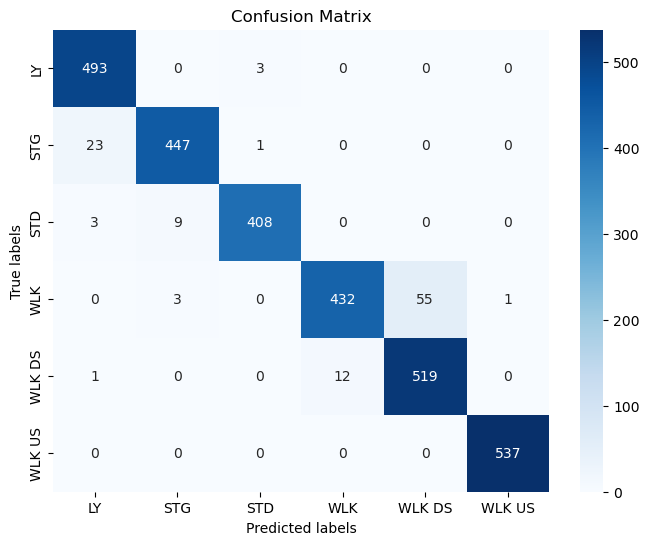

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions using the best logistic regression model
y_pred = best_lr_model.predict(X_test)

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["LY", "STG", "STD", "WLK", "WLK DS", "WLK US"], 
            yticklabels=["LY", "STG", "STD", "WLK", "WLK DS", "WLK US"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Support Vector Machine 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

def support_vector_machine_with_cv_rbf(X_train, y_train, X_test, y_test):
    # Initialize Support Vector Machine model with RBF kernel
    svm_model = SVC(kernel='rbf', random_state=42)

    # Fit the model on the training data
    svm_model.fit(X_train, y_train)

    # Predict on the testing data
    y_pred = svm_model.predict(X_test)

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Generate classification report
    cls_report = classification_report(y_test, y_pred)

    return conf_matrix, cls_report

# Apply SVM with RBF kernel on training data and evaluate on testing data
conf_matrix, cls_report = support_vector_machine_with_cv_rbf(X_train, y_train, X_test, y_test)

# Print the classification report
print("Classification Report:")
print(cls_report)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947


Confusion Matrix:
[[488   5   3   0   0   0]
 [ 20 451   0   0   0   0]
 [ 10  26 384   0   0   0]
 [  0   2   0 438  51   0]
 [  0   0   0  29 503   0]
 [  0   0   0   0   0 537]]


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

def random_forest_with_cv(X_train, y_train, X_test, y_test):
    # Initialize Random Forest model
    rf_model = RandomForestClassifier(criterion='gini', random_state=42)

    # Define hyperparameters for randomized search
    param_distributions = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform randomized search with cross-validation
    random_search = RandomizedSearchCV(rf_model, param_distributions, n_iter=10, cv=3, random_state=42)

    # Fit the randomized search object to the training data
    random_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = random_search.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Generate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Return the best model found by randomized search and confusion matrix
    return random_search.best_estimator_, conf_matrix

# Apply Random Forest with randomized search and cross-validation
best_rf_model, rf_conf_matrix = random_forest_with_cv(X_train, y_train, X_test, y_test)


In [4]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


def extra_trees_with_cv(X_train, y_train, X_test, y_test):
    # Initialize Extra Trees model
    et_model = ExtraTreesClassifier(criterion='gini', random_state=42)

    # Define hyperparameters for randomized search
    param_distributions = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Perform randomized search with cross-validation
    random_search = RandomizedSearchCV(et_model, param_distributions, n_iter=10, cv=3, random_state=42)

    # Fit the randomized search object to the training data
    random_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = random_search.predict(X_test)

    # Generate and print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # Generate and print classification report
    cls_report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(cls_report)

    # Return the best model found by randomized search, confusion matrix, and classification report
    return random_search.best_estimator_, conf_matrix, cls_report

# Apply Extra Trees with randomized search and cross-validation
best_et_model, et_conf_matrix, et_cls_report = extra_trees_with_cv(X_train, y_train, X_test, y_test)



Confusion Matrix:
[[484   3   9   0   0   0]
 [ 21 444   6   0   0   0]
 [ 19  45 356   0   0   0]
 [  0   1   0 440  50   0]
 [  0   0   0  10 522   0]
 [  0   0   0   0   0 537]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       496
           2       0.90      0.94      0.92       471
           3       0.96      0.85      0.90       420
           4       0.98      0.90      0.94       491
           5       0.91      0.98      0.95       532
           6       1.00      1.00      1.00       537

    accuracy                           0.94      2947
   macro avg       0.95      0.94      0.94      2947
weighted avg       0.95      0.94      0.94      2947



In [ ]:
# K-Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

def knn_with_cv(X_train, y_train, X_test, y_test):
    # Initialize KNN model
    knn_model = KNeighborsClassifier()
    param_distributions = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
    }

    random_search = RandomizedSearchCV(knn_model, param_distributions, n_iter=10, cv=3, random_state=42)
    # Training the data
    random_search.fit(X_train, y_train)

    # Evaluate the model on the testing data
    y_pred = random_search.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    cls_report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(cls_report)
    return random_search.best_estimator_, conf_matrix, cls_report

best_knn_model, knn_conf_matrix, knn_cls_report = knn_with_cv(X_train, y_train, X_test, y_test)
